# WSI - Ćwiczenie 5

*Autor: Maksymilian Nowak*

### Cel ćwiczenia

Celem ćwiczenia jest zaimplementowanie algorytmu Q-learning z $\varepsilon$-zachłanną strategią losowania akcji. Algorytm należy zastosować do wytrenowania agenta rozwiązującego problemu *Cliff Walking* dostępnego w pakiecie `gymnasium`.

Należy zbadać wpływ współczynnika dyskontowania ($\lambda$) i szybkości uczenia ($\beta$) na działanie algorytmu.

## Implementacja algorytmu

In [1]:
import numpy as np

def q_learning(env, episodes, _lambda, beta, epsilon, t_max=150):
    '''
    :param env: środowisko
    :param episodes: liczba epizodów
    :param _lambda: współczynnik dyskontowania
    :param beta: współczynnik uczenia
    :param epsilon: współczynnik eksploracji
    '''
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    steps = []
    for _ in range(episodes):
        # Ocena strategii
        sum_reward = 0
        step = 0

        # Właściwy algorytm
        state = env.reset()[0]
        done = False
        t = 0
        while t < t_max and not done:
            # Epsilon-zachłanna strategia
            if np.random.uniform() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            sum_reward += reward
            step += 1
            Q[state][action] += beta * (reward + _lambda * np.max(Q[next]) - Q[state][action])
            state = next
            t += 1
        else:
            # Zapisanie wyników
            rewards.append(sum_reward)
            steps.append(step)

    return Q, rewards, steps


#### Inicjalizacja środowiska

Wyniki uczenia:
Minimalna nagroda: -546
Maksymalna nagroda: -13
Średnia nagroda: -59.74
Minimalna liczba kroków: 13
Maksymalna liczba kroków: 150
Średnia liczba kroków: 24.1


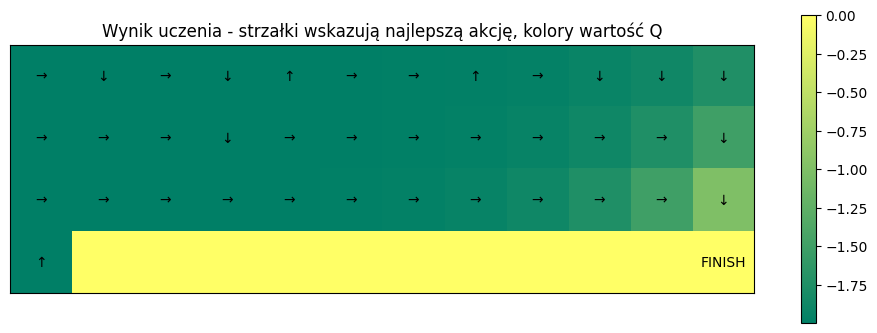

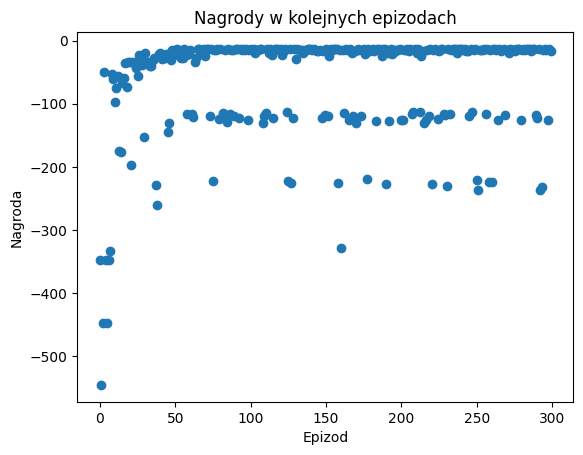

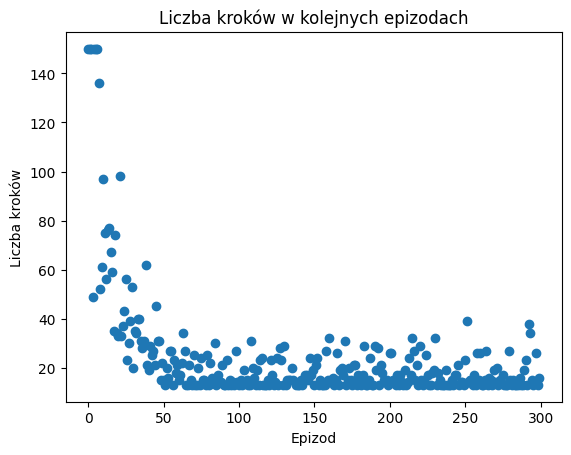

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt

def learning_results(enviro, episodes, _lambda, beta, epsilon, t_max=150):
    Q, rewards, steps = q_learning(enviro, episodes, _lambda, beta, epsilon, t_max)

    def arrows(direction, value):
        if value.all() == 0:
            return ' '
        if direction == '0':
            return '↑'
        elif direction == '1':
            return '→'
        elif direction == '2':
            return '↓'
        elif direction == '3':
            return '←'

    print('Wyniki uczenia:')
    print(f'Minimalna nagroda: {np.min(rewards)}')
    print(f'Maksymalna nagroda: {np.max(rewards)}')
    print(f'Średnia nagroda: {np.mean(rewards)}')
    print(f'Minimalna liczba kroków: {np.min(steps)}')
    print(f'Maksymalna liczba kroków: {np.max(steps)}')
    print(f'Średnia liczba kroków: {np.mean(steps)}')

    heatmap = np.max(Q, axis=1).reshape((4, 12))
    plt.figure(figsize=(12, 4))
    plt.imshow(heatmap, cmap='summer', interpolation='nearest')
    for y in range(4):
        for x in range(12):
            q_value = Q[y * 12 + x]
            plt.text(x, y, arrows(str(np.argmax(q_value)), q_value), color='black', ha='center', va='center')
    plt.annotate('FINISH', xy=(11.5, 3.5), xytext=(11, 3), color='black', ha='center', va='center')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.title('Wynik uczenia - strzałki wskazują najlepszą akcję, kolory wartość Q')
    plt.show()

    plt.scatter(range(len(rewards)), rewards)
    plt.xlabel('Epizod')
    plt.ylabel('Nagroda')
    plt.title('Nagrody w kolejnych epizodach')
    plt.show()

    plt.scatter(range(len(steps)), steps)
    plt.xlabel('Epizod')
    plt.ylabel('Liczba kroków')
    plt.title('Liczba kroków w kolejnych epizodach')
    plt.show()

env = gym.make('CliffWalking-v0')

learning_results(env, 300, 0.5, 0.5, 0.1)

Wyniki uczenia:
Minimalna nagroda: -645
Maksymalna nagroda: -13
Średnia nagroda: -29.043333333333333
Minimalna liczba kroków: 13
Maksymalna liczba kroków: 150
Średnia liczba kroków: 20.793333333333333


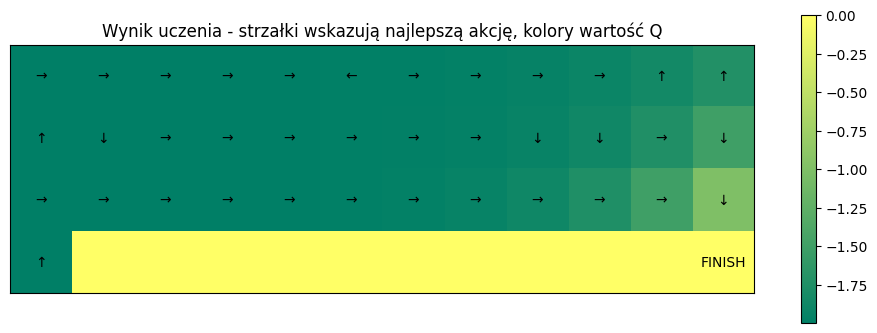

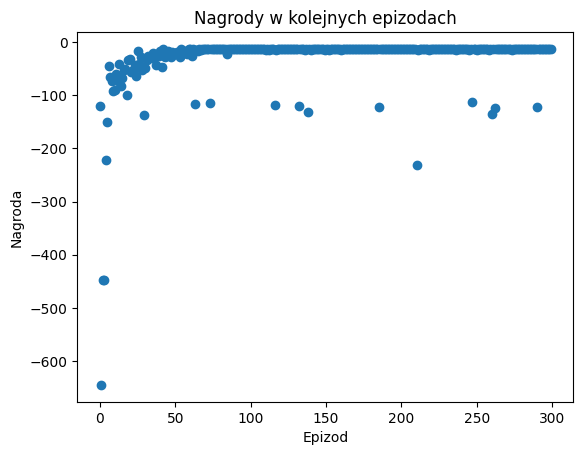

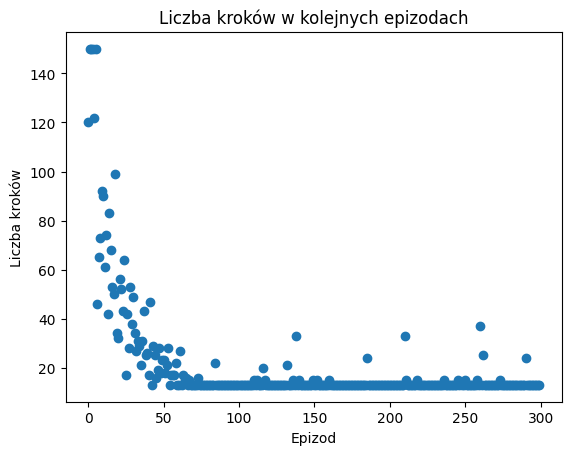

In [3]:
learning_results(env, 300, 0.5, 0.5, 0.01)

Wyniki uczenia:
Minimalna nagroda: -2427
Maksymalna nagroda: -27
Średnia nagroda: -1038.6066666666666
Minimalna liczba kroków: 26
Maksymalna liczba kroków: 150
Średnia liczba kroków: 125.82666666666667


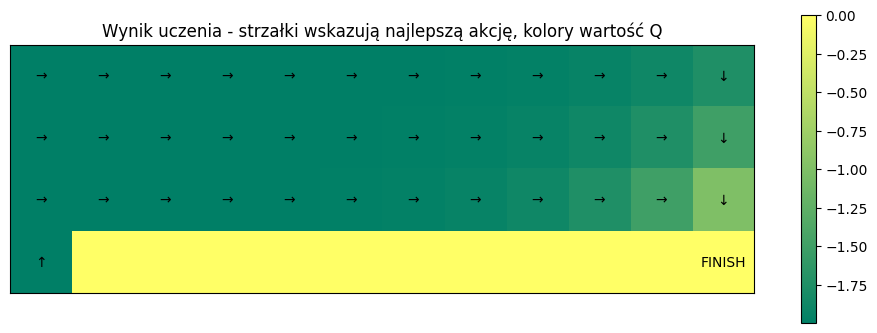

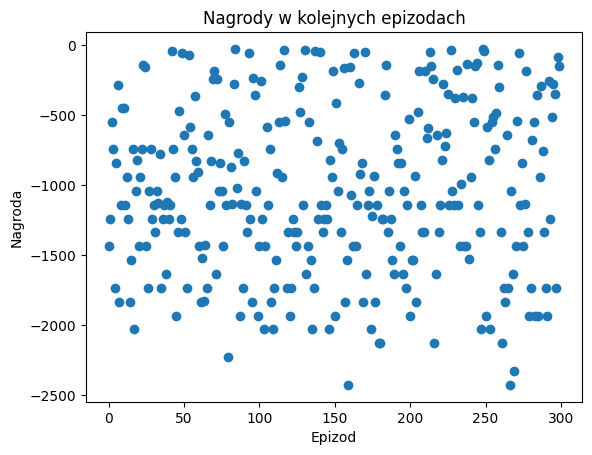

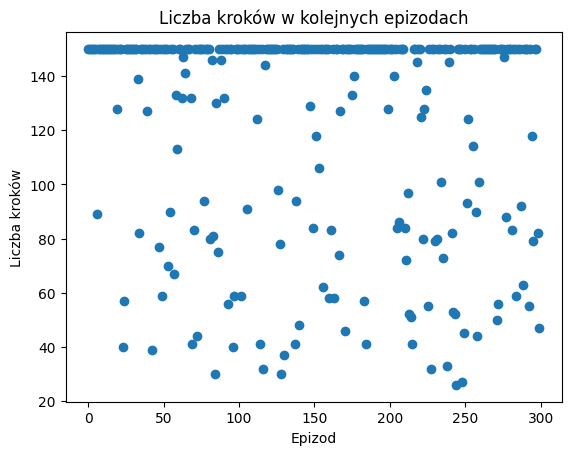

In [4]:
learning_results(env, 300, 0.5, 0.5, 0.8)

## Badanie wpływu parametrów na działanie algorytmu

### Współczynnik dyskontowania

Lambda: 0.01, średnia nagroda: -164.54453333333333, średnia liczba kroków: 145.60913333333335
Lambda: 0.05, średnia nagroda: -123.2636, średnia liczba kroków: 98.7182
Lambda: 0.1, średnia nagroda: -68.60113333333334, średnia liczba kroków: 28.92193333333333
Lambda: 0.15, średnia nagroda: -67.17013333333334, średnia liczba kroków: 27.543733333333332
Lambda: 0.2, średnia nagroda: -65.69906666666667, średnia liczba kroków: 26.627066666666668
Lambda: 0.25, średnia nagroda: -64.7826, średnia liczba kroków: 26.0208
Lambda: 0.3, średnia nagroda: -62.958333333333336, średnia liczba kroków: 25.410933333333332
Lambda: 0.35, średnia nagroda: -61.687333333333335, średnia liczba kroków: 24.912133333333333
Lambda: 0.4, średnia nagroda: -62.8576, średnia liczba kroków: 24.7624
Lambda: 0.45, średnia nagroda: -61.301066666666664, średnia liczba kroków: 24.393866666666668
Lambda: 0.5, średnia nagroda: -61.0798, średnia liczba kroków: 24.166
Lambda: 0.55, średnia nagroda: -60.449, średnia liczba kroków: 

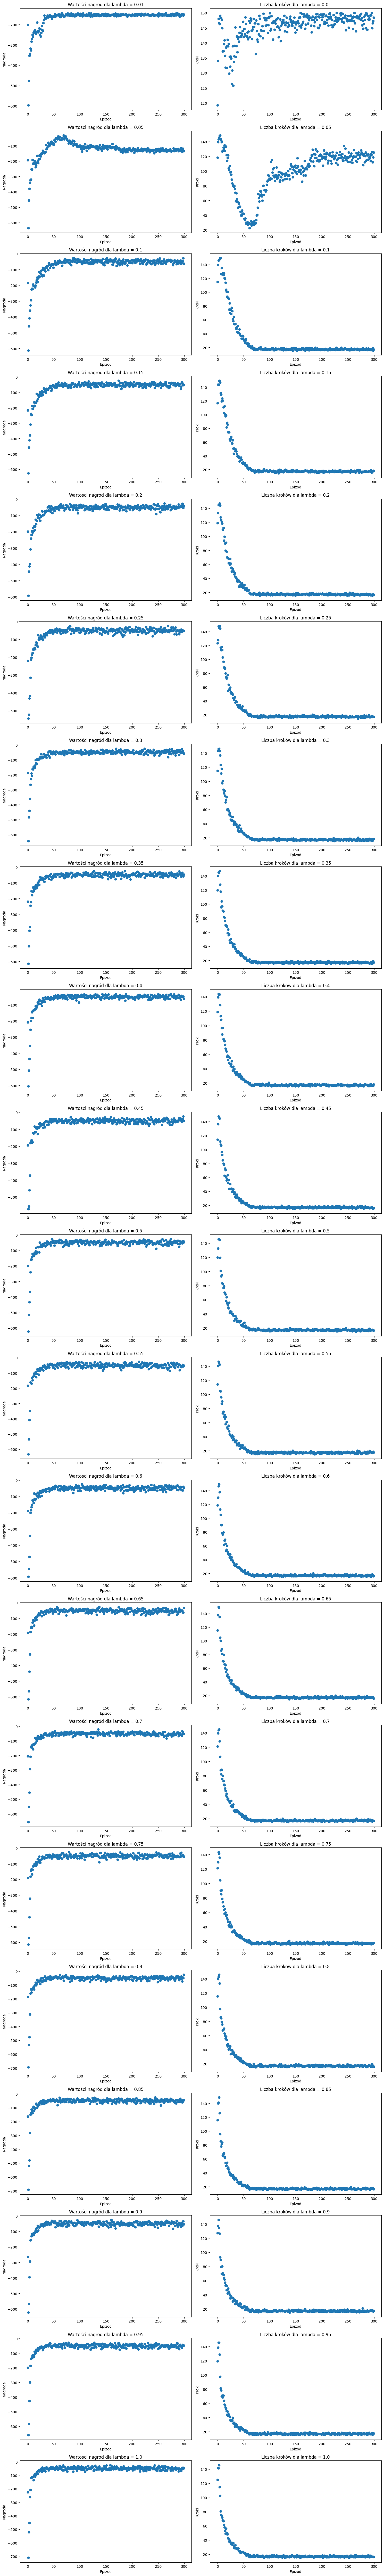

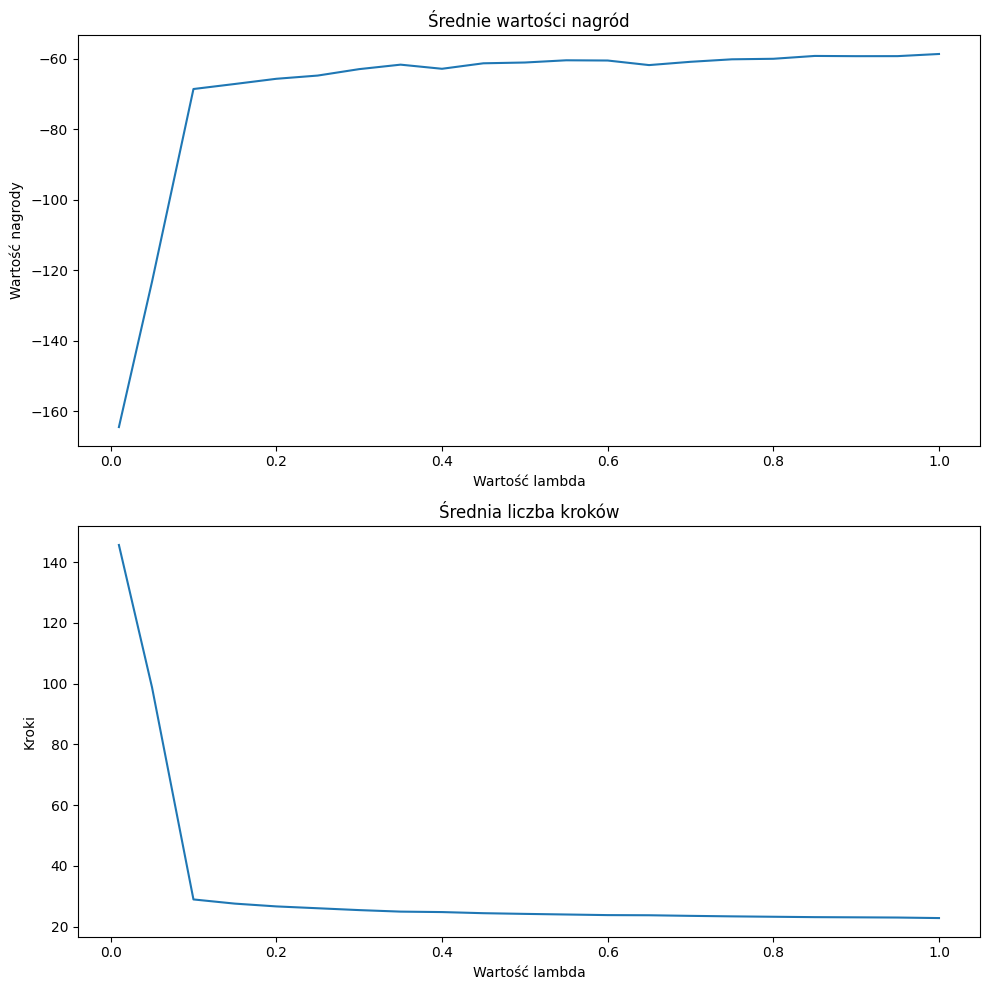

In [5]:
import matplotlib.pyplot as plt

def plot_lambda(values):
    rewards = []
    steps = []
    fig1, ax1 = plt.subplots(21, 2, figsize=(15, 100))
    for _lambda in values:
        lambda_rewards = []
        lambda_steps = []
        for _ in range(50):
            _, r, s = q_learning(env, 300, _lambda, 0.5, 0.1)
            lambda_rewards.append(r)
            lambda_steps.append(s)
        avg_episode_rewards = np.mean(lambda_rewards, axis=0)
        avg_episode_steps = np.mean(lambda_steps, axis=0)
        ax1[values.index(_lambda)][0].scatter(range(len(avg_episode_rewards)), avg_episode_rewards)
        ax1[values.index(_lambda)][0].set_xlabel('Epizod')
        ax1[values.index(_lambda)][0].set_ylabel('Nagroda')
        ax1[values.index(_lambda)][0].set_title(f'Wartości nagród dla lambda = {_lambda}')
        ax1[values.index(_lambda)][1].scatter(range(len(avg_episode_steps)), avg_episode_steps)
        ax1[values.index(_lambda)][1].set_xlabel('Epizod')
        ax1[values.index(_lambda)][1].set_ylabel('Kroki')
        ax1[values.index(_lambda)][1].set_title(f'Liczba kroków dla lambda = {_lambda}')
        avg_reward = np.mean(lambda_rewards)
        avg_steps = np.mean(lambda_steps)
        print(f'Lambda: {_lambda}, średnia nagroda: {avg_reward}, średnia liczba kroków: {avg_steps}')
        rewards.append(avg_reward)
        steps.append(avg_steps)
    fig1.tight_layout()
    fig2, ax2 = plt.subplots(2, figsize=(10, 10))
    ax2[0].plot(values, rewards)
    ax2[0].set_xlabel('Wartość lambda')
    ax2[0].set_ylabel('Wartość nagrody')
    ax2[0].set_title('Średnie wartości nagród')
    ax2[1].plot(values, steps)
    ax2[1].set_xlabel('Wartość lambda')
    ax2[1].set_ylabel('Kroki')
    ax2[1].set_title('Średnia liczba kroków')
    fig2.tight_layout()
    plt.show()

plot_lambda([0.01] + [round(0.05 * i, 2) for i in range(1, 21)])

### Współczynnik szybkości uczenia się

Beta: 0.01, średnia nagroda: -222.62066666666666, średnia liczba kroków: 132.03566666666666
Beta: 0.05, średnia nagroda: -138.0074, średnia liczba kroków: 80.5544
Beta: 0.1, średnia nagroda: -97.97293333333333, średnia liczba kroków: 54.010333333333335
Beta: 0.15, średnia nagroda: -82.72433333333333, średnia liczba kroków: 41.69873333333334
Beta: 0.2, średnia nagroda: -75.15713333333333, średnia liczba kroków: 35.53073333333333
Beta: 0.25, średnia nagroda: -70.72546666666666, średnia liczba kroków: 31.798666666666666
Beta: 0.3, średnia nagroda: -67.8836, średnia liczba kroków: 29.267
Beta: 0.35, średnia nagroda: -65.18713333333334, średnia liczba kroków: 27.474733333333333
Beta: 0.4, średnia nagroda: -63.48566666666667, średnia liczba kroków: 26.050466666666665
Beta: 0.45, średnia nagroda: -62.82646666666667, średnia liczba kroków: 25.067866666666667
Beta: 0.5, średnia nagroda: -62.35166666666667, średnia liczba kroków: 24.236666666666668
Beta: 0.55, średnia nagroda: -60.20486666666667

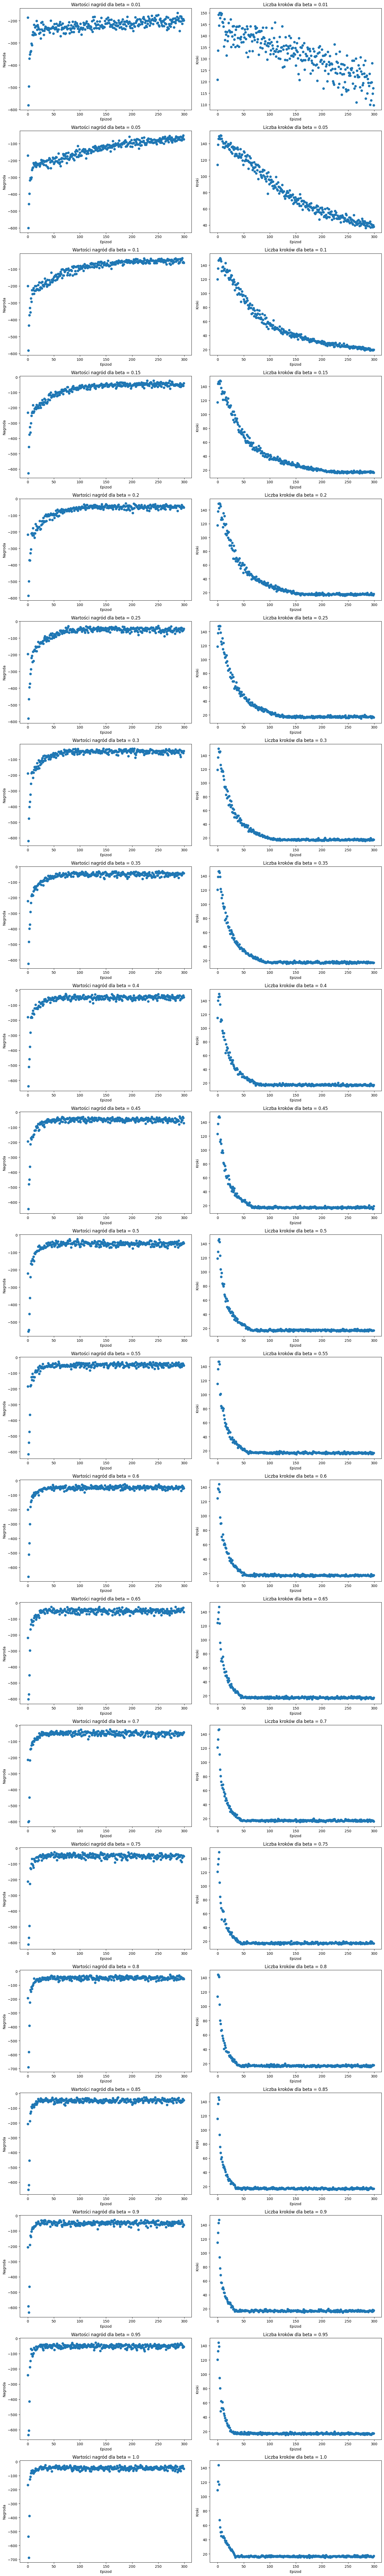

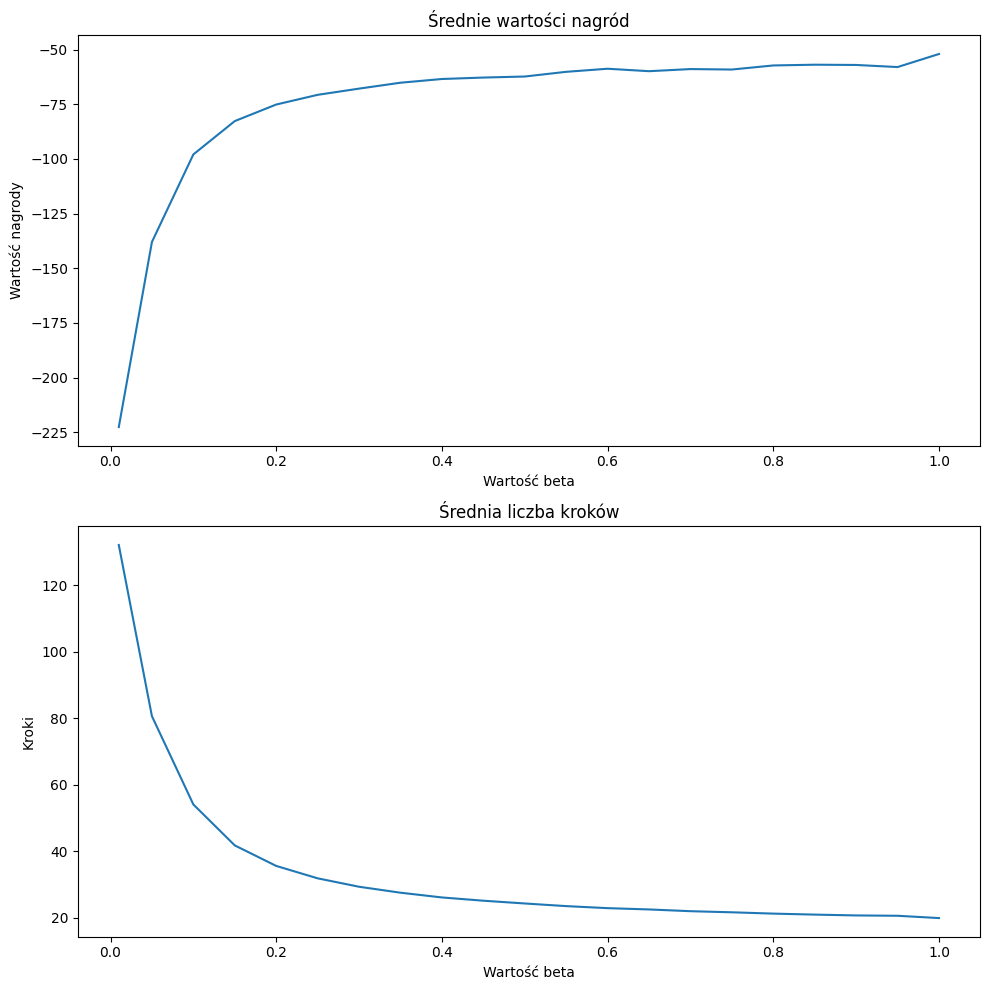

In [6]:
import matplotlib.pyplot as plt

def plot_beta(values):
    rewards = []
    steps = []
    fig1, ax1 = plt.subplots(21, 2, figsize=(15, 100))
    for beta in values:
        beta_rewards = []
        beta_steps = []
        for _ in range(50):
            _, r, s = q_learning(env, 300, 0.5, beta, 0.1)
            beta_rewards.append(r)
            beta_steps.append(s)
        avg_episode_rewards = np.mean(beta_rewards, axis=0)
        avg_episode_steps = np.mean(beta_steps, axis=0)
        ax1[values.index(beta)][0].scatter(range(len(avg_episode_rewards)), avg_episode_rewards)
        ax1[values.index(beta)][0].set_xlabel('Epizod')
        ax1[values.index(beta)][0].set_ylabel('Nagroda')
        ax1[values.index(beta)][0].set_title(f'Wartości nagród dla beta = {beta}')
        ax1[values.index(beta)][1].scatter(range(len(avg_episode_steps)), avg_episode_steps)
        ax1[values.index(beta)][1].set_xlabel('Epizod')
        ax1[values.index(beta)][1].set_ylabel('Kroki')
        ax1[values.index(beta)][1].set_title(f'Liczba kroków dla beta = {beta}')
        avg_reward = np.mean(beta_rewards)
        avg_steps = np.mean(beta_steps)
        print(f'Beta: {beta}, średnia nagroda: {avg_reward}, średnia liczba kroków: {avg_steps}')
        rewards.append(avg_reward)
        steps.append(avg_steps)
    fig1.tight_layout()
    fig2, ax2 = plt.subplots(2, figsize=(10, 10))
    ax2[0].plot(values, rewards)
    ax2[0].set_xlabel('Wartość beta')
    ax2[0].set_ylabel('Wartość nagrody')
    ax2[0].set_title('Średnie wartości nagród')
    ax2[1].plot(values, steps)
    ax2[1].set_xlabel('Wartość beta')
    ax2[1].set_ylabel('Kroki')
    ax2[1].set_title('Średnia liczba kroków')
    fig2.tight_layout()
    plt.show()

plot_beta([0.01] + [round(0.05 * i, 2) for i in range(1, 21)])